In [1]:
#Page3
#Least squares regression - m iterations of measurements; good to have m >>n, to get the data
#Want to minimize E; e is individual error. 

In [2]:
#Page4
#beta is the coefficients

In [5]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

#Beta = (A^T*A)^-1 * A^T * Y                        #Pseudo inverse
#y = 1 + 1.5x

x = np.linspace(0,1,101)                            #0 to 1
y = 1 + x + x * np.random.random(len(x))            #our y function is 1 + (1 + alpha)x; four our case in the slide, its 1 +  1.5x but it can change

A = np.vstack([x,np.ones(len(x))]).T                #concatanate matrices;

y = y[:, np.newaxis]                                #change 1d vector to column vector

alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)

#this changes, because some variables are random
print(alpha)

[[1.40050238]
 [1.02441281]]


In [7]:
#Another way: built in function
pinv = np.linalg.pinv(A)
alpha = pinv.dot(y)

alpha = np.linalg.lstsq(A, y, rcond = None)[0]
print(alpha)

#exact solution

[[1.40050238]
 [1.02441281]]


In [8]:
#Another way
x = np.linspace(0,1,101)
y = 1 + x + x*np.random.random(len(x))

def func(x,a,b):
    y = a*x + b
    return y

alpha = optimize.curve_fit(func, xdata = x, ydata = y)[0]                   #optimize function minimizes the E error

#dont need to do y = y[:, np.newaxis] or y = y[:, None]
# Not all functions can be used for least squares regression
# So optimization may be good, but sometimes it only finds the local minimum and not the global minimum - so not accurate


In [9]:
#there are tricks to make nonlinear functions linear
#if there are multiple variables like y = alpha1*cost(t) + alpha2*x; then y = f(t,x)
#the they will be considered two different functions, and need to generate two different matrices

alpa=0.13936696959628575, beta=0.26311182599377325


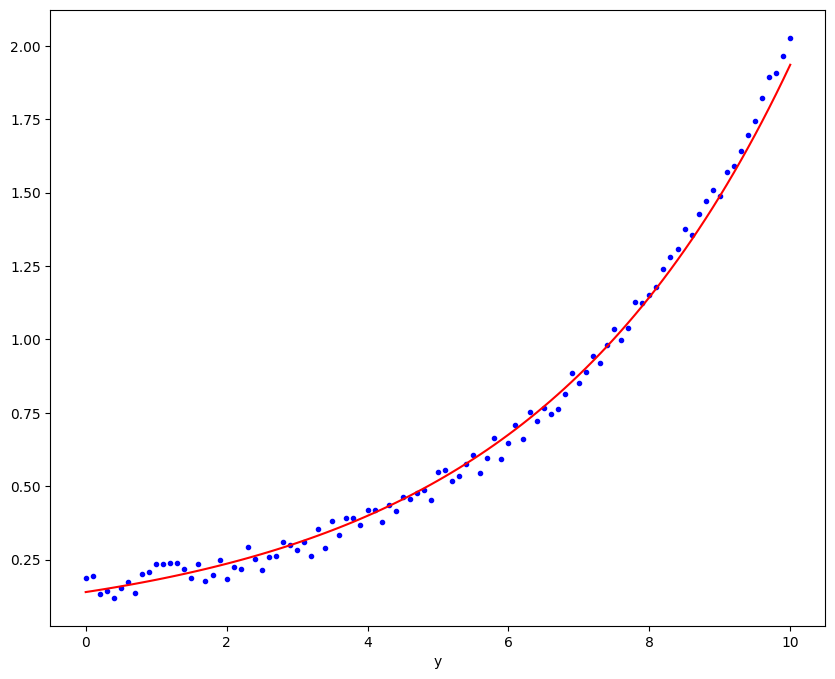

In [11]:
x = np.linspace(0,10,101)
y = 0.1* np.exp(0.3*x) + 0.1*np.random.random(len(x))

A = np.vstack([x, np.ones(len(x))]).T
beta, logAlpha = np.linalg.lstsq(A, np.log(y), rcond = None)[0]
alpha = np.exp(logAlpha)
print(f'alpa={alpha}, beta={beta}')

#log is natural logarithm for numpy

plt.figure(figsize = (10,8))
plt.plot(x,y, 'b.')
plt.plot(x, alpha*np.exp(beta*x), 'r')
plt.xlabel('x')
plt.xlabel('y')
plt.show()

In [13]:
#What do you do whe there are many variables? I didnt catch what the professor said
def func(x,a,b):
    y = a * np.exp(b*x)
    return y

alpha, beta = optimize.curve_fit(func, xdata=x, ydata= y)[0]
print(f'alpa={alpha}, beta={beta}')


alpa=0.12936938755886906, beta=0.27437299828110473


[[-0.19      ]
 [ 0.54888889]]


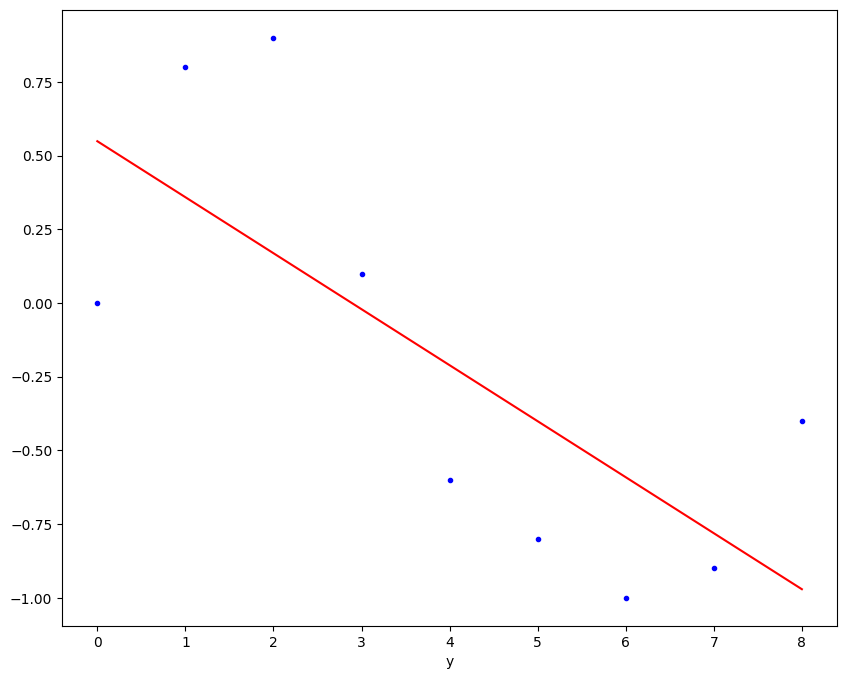

In [15]:
#f(x) = alpha3 *x^3 + alpha2x^2 + alpha1 * x + alpha0

xD = np.array([0,1,2,3,4,5,6,7,8])
yD = np.array([0, 0.8, 0.9, 0.1, -0.6, -0.8, -1, -0.9, -0.4])

A = np.vstack([xD, np.ones(len(xD))]).T

y = yD[:, None]

a = np.dot((np.dot(np.linalg.inv(np.dot(A.T, A)), A.T)), y)
print(a)

plt.figure(figsize = (10,8))
plt.plot(xD,yD, 'b.')
plt.plot(xD, a[0] * xD + a[1], 'r')                                 #where a[0] = alpha1, and a[1] = alpha0
plt.xlabel('x')
plt.xlabel('y')
plt.show()

[[ 0.03291246]
 [-0.38109668]
 [ 0.89060847]
 [ 0.12525253]]


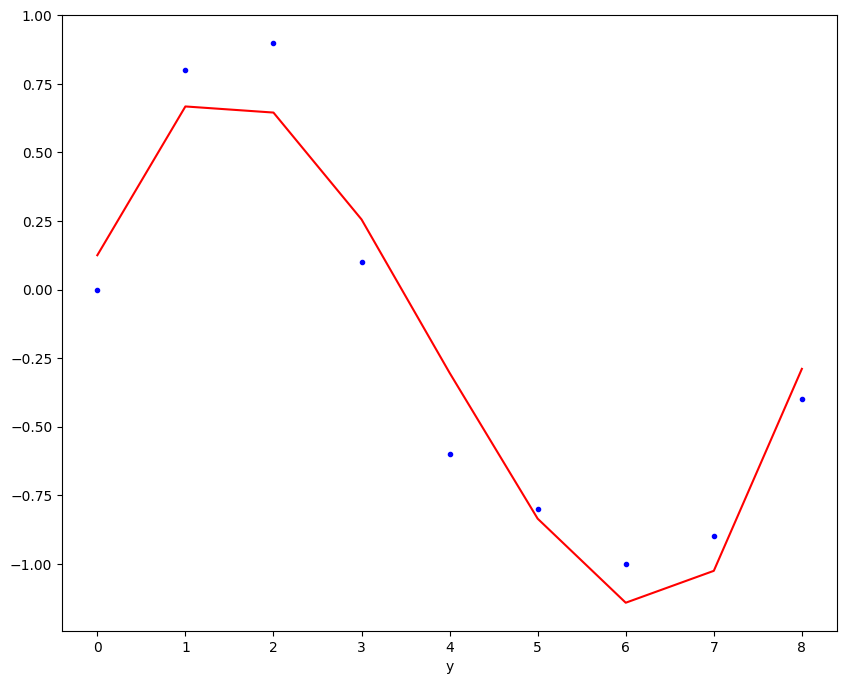

In [16]:
#f(x) = alpha3 *x^3 + alpha2x^2 + alpha1 * x + alpha0

xD = np.array([0,1,2,3,4,5,6,7,8])
yD = np.array([0, 0.8, 0.9, 0.1, -0.6, -0.8, -1, -0.9, -0.4])

A = np.vstack([xD **3, xD **2, xD, np.ones(len(xD))]).T

y = yD[:, None]

a = np.dot((np.dot(np.linalg.inv(np.dot(A.T, A)), A.T)), y)
print(a)

plt.figure(figsize = (10,8))
plt.plot(xD,yD, 'b.')
plt.plot(xD, a[0]*xD**3 + a[1]*xD**2 + a[2]*xD + a[3], 'r')                                 #where a[0] = alpha1, and a[1] = alpha0
plt.xlabel('x')
plt.xlabel('y')
plt.show()

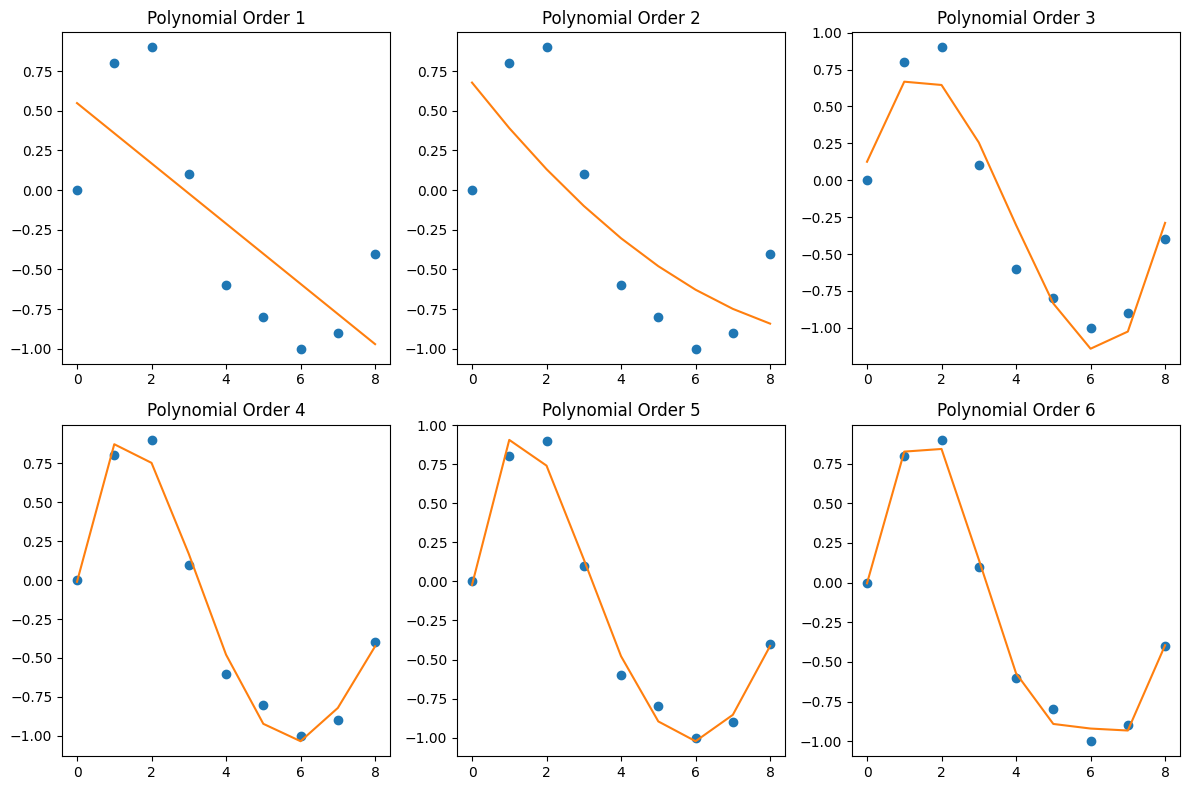

In [18]:
xD = np.array([0,1,2,3,4,5,6,7,8])
yD = np.array([0, 0.8, 0.9, 0.1, -0.6, -0.8, -1, -0.9, -0.4])

plt.figure(figsize= (12, 8))

for i in range(1,7):

    yEst = np.polyfit(xD, yD, i)                #i is the order of the function
    plt.subplot(2,3,i)
    plt.plot(xD, yD, 'o')

    plt.plot(xD, np.polyval(yEst, xD))          #polyval uses the coefficients or parameters, compare with code above. apparently the same thing??       
                                                #using substitution?; good for for loops apparently
    plt.title(f'Polynomial Order {i}')

plt.tight_layout()
plt.show()

In [7]:
#Error Types

##Syntax Error
###Assigning to a literal
#1 = x

###Not Matching parentheses
#(1]

###No colon
#if True

###Division by Zero
#1/0

###Not matching the datatype
#x = [2]         #list
#x + 2           #list + int

###Not defined variable
#print(a)

###Bad Logic
#def badFactorial(n):
    #out = 0                     #because this is 0, the output is 0
    #for i in range(1, n+1):
        #out = out * i
    #return out

#badFactorial(4)

0

In [15]:
#Tips Avoid Errors

##Segmenting the code
y = x**2 + 2 * x + 1
print(y)

y = x **2
y = y+2*x
y = y+1
print(y)

##Using variables for numbers 
import numpy as np

s = 0
a= np.random.rand(10)

for i in range(10):
    s = s + a[i]


###Might need to change parameters, so extracting n is helpful for later debugging and refactoring
n = 10
s = 0                           #initialized as zero before loop is good
a = np.random.rand(n)

for i in range(n):
    s = s+ a[i]

s = sum(np.random.random(10))


1
1
4.554153760148038
6.3858185206106


In [22]:
#Try/Except
##Smoother coding
x = '6'                     #assigning string
try:
    if x > 3:               #comparing strings and int    
        print('X > 3')
except TypeError:           #using Exception name as condition; if it hits this error, interrupts
#except ValueError:          #if this wrong exception name, error arises
    print('x not valid')

def testException(x):
    try:
        x = int(x)
        if x > 3:
            print(x)
    except TypeError:
        print('TypeError')
    except ValueError:
        print('ValueError')
    except:                                 #When no specific error
        print('Unexpected Error')

x = [1,2]
testException(x)

x = 's'
testException(x)

#Raising your own defined exceptions
###using too much of this, might make the algorithm not good. Use with discretion
#x = 10
#if x > 5:
    #raise(Exception('x should be less than or equal to 5'))                         #raising errors are like printing

x not valid
TypeError
ValueError


In [23]:
#Type Checking

def Adder(a,b,c):
    if isinstance(a, float) and isinstance(b, float) and isinstance(c, float):          #type checking
        pass
    else:
        raise(TypeError('Must be floats'))

    out = a + b + c

    return out

Adder(1.0, 2.0, 3.0)
###problem with this is that you can only do floats

#Multiple typechecking at once; shorter than doing if((type(a) == float or (type(a == int))) and ...)
def Adder(a,b,c):
    if isinstance(a, (float, int, complex)) and isinstance(b, (float, int, complex)) and isinstance(c, (float, int, complex)):          #type checking
        pass
    else:
        raise(TypeError('Must be floats'))

    out = a + b + c

    return out

print(Adder(1,2,3))
print(Adder(1.0,2,3))
print(Adder(1j,2 + 2j,3 +2j))

6
6.0
(5+5j)


In [25]:
#Debugging
def squareNumber(x):
    sq = x ** 2
    sq += x
    
    return sq

#print(squareNumber('10'))

In [30]:
#%debug

#%pdb on                        #automatically turn on debugger when hit with error
#print(squareNumber('10'))


In [32]:
import pdb

def squareNumber(x):

    sq = x **2

    #add break point
    #pdb.set_trace()

    sq += x

    return sq

squareNumber(3)

12